In [1]:
import pandas as pd

# Đọc file dataset 1
data_booking = pd.read_csv('dataset/booking_hotel.csv', encoding='latin1')
# Hiển thị dữ liệu
print("Dữ liệu huấn luyện (booking_hotel.csv):")
print(data_booking.head())  # Hiển thị 5 dòng đầu tiên

Dữ liệu huấn luyện (booking_hotel.csv):
                          Hotel Name                       Location Rating  \
0   Krabi La Playa Resort - SHA Plus                  Ao Nang Beach    8.2   
1        KC Beach Club & Pool Villas  Chaweng City Center , Chaweng    7.1   
2       Rawai VIP Villas & Kids Park                    Rawai Beach    8.3   
3    FuramaXclusive Sathorn, Bangkok              Bang Rak, Bangkok    7.7   
4  Bo Phut Resort and Spa - SHA Plus                         Bophut    9.3   

  Review Score Number of     Room    Score  \
0    Very Good          141            8.6   
1         Good          193            NaN   
2    Very Good           63            8.9   
3         Good        1,304            8.1   
4    Wonderful          294            9.6   

                               Room Type                Bed Type  \
0             Deluxe Double or Twin Room     1 double or 2 twins   
1  Double Room with Balcony and Sea View             1 queen bed   
2         

In [4]:
# Kiểm tra giá trị thiếu
print(data_booking.isnull().sum())
# Ví dụ: loại bỏ các hàng có giá trị thiếu
data_booking.dropna(inplace=True)

Hotel Name                                     0
Location                                       0
Rating                                       100
Review Score                                 106
Number of                                    106
Room    Score                                756
Room Type                                      0
Bed Type                                      16
Room Price (in BDT or any other currency)      0
dtype: int64


In [23]:
data_booking['Label'] = data_booking['Review Score'].map({
    'Wonderful': 2,
    'Excellent': 2,
    'Very Good': 1,
    'Good': 1,
    'Review score': 0,
    'Kém': 0  # Thêm bất kỳ nhãn nào cần thiết
})
data_booking['Room Price'] = data_booking['Room Price (in BDT or any other currency)'].replace({'[^0-9]': ''}, regex=True).astype(float)
# Xóa khoảng trắng thừa trong tên khách sạn
data_booking['Hotel Name'] = data_booking['Hotel Name'].str.strip()
print(data_booking['Label'].isnull().sum())
data_booking.dropna(subset=['Label'], inplace=True)
print(data_booking['Label'].isnull().sum())
print(data_booking['Rating'].isnull().sum())
data_booking.dropna(subset=['Rating'], inplace=True)
print(data_booking['Room    Score'].isnull().sum())
data_booking.dropna(subset=['Room    Score'], inplace=True)

0
0
0
0


In [52]:
X = data_booking[['Rating','Room    Score', 'Room Price']]
y = data_booking['Label']

In [53]:
# 8. Chia tập dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# Khởi tạo mô hình SVM
model = SVC(kernel='linear')  # Bạn có thể thử các kernel khác như 'rbf', 'poly', v.v.

# Huấn luyện mô hình
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [57]:
from sklearn.metrics import confusion_matrix
# Dự đoán
y_pred = model.predict(X_test_scaled)
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# In ra ma trận nhầm lẫn
print("Confusion Matrix:")
print(cm)
# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  0   1   0]
 [  0 307   0]
 [  0   0 219]]
Accuracy: 0.9981024667931688
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       219

    accuracy                           1.00       527
   macro avg       0.67      0.67      0.67       527
weighted avg       1.00      1.00      1.00       527



f:\Hoang_A\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Hoang_A\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Hoang_A\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


f:\Hoang_A\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


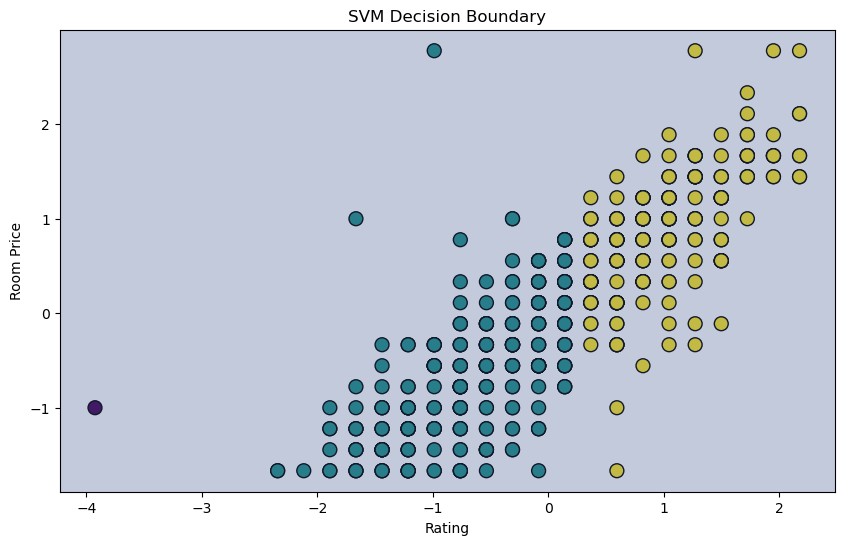

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Vẽ mô hình
plt.figure(figsize=(10, 6))

# Lấy các điểm dữ liệu cho biểu đồ
X_plot = X_test_scaled[:, :2]  # Chỉ lấy 2 đặc trưng đầu tiên để vẽ
y_plot = y_test

# Vẽ các điểm dữ liệu
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap='viridis', edgecolor='k', s=100)

# Vẽ đường quyết định
xlim = plt.xlim()
ylim = plt.ylim()

# Tạo lưới để dự đoán
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())[:, None]]))  # Thay thế với một giá trị cố định cho cột thứ ba
Z = Z.reshape(xx.shape)

# Vẽ đường quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Rating')
plt.ylabel('Room Price')
plt.title('SVM Decision Boundary')
plt.show()


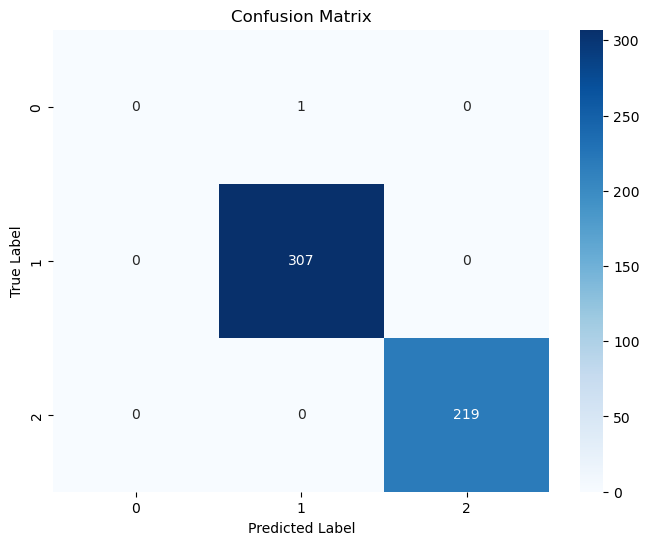

In [58]:
import seaborn as sns
# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()